<a href="https://colab.research.google.com/github/eilidhsteel/.github/blob/master/Eilidh_40509130_SET09420_CW1_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SET09420 Coursework 1
Eilidh Steel | 40509130  


###Required Set up

In [ ]:
#Mount to Google Drive for file access
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)
root_path = 'gdrive/My Drive/DataAnalytics/Coursework' #Edit this string to contain the root path of the data files in your Google Drive, or... (see line 8)
task_A_path = root_path + "/excess_mortality.csv"
task_B_path = root_path + "/Titanic.csv"

#Un-comment and run the below code to connect to the data files when running this notebook locally
'''
#Dummy code
'''

Mounted at /content/gdrive


'\n#Dummy code\n'

In [ ]:
#Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#Task A: 
You will need to use the dataset ’excess_mortabliy.csv’ that is downloadable from moodle
assessment to answer the following questions based on data. For each question, you will need to
provide the Python code as well as a short description on why you solved the problem using the
techniques/tools/libraries you chose. A general discussion of your results and how you evaluate
your results need to be discussed. 

###Read & review raw data

In [ ]:
#Read the raw data from CSV and convert to dataframe
df = pd.read_csv(task_A_path, header = 0)

In [ ]:
#Review the raw data - look at the first/last rows
df.head(n=10)
#df.tail(n=10)

,location,date,p_scores_all_ages,p_scores_15_64,p_scores_65_74,p_scores_75_84,p_scores_85plus,deaths_2020_all_ages,average_deaths_2015_2019_all_ages,deaths_2015_all_ages,...,deaths_2017_all_ages,deaths_2018_all_ages,deaths_2019_all_ages,deaths_2010_all_ages,deaths_2011_all_ages,deaths_2012_all_ages,deaths_2013_all_ages,deaths_2014_all_ages,Week,deaths_2021_all_ages
0,Austria,2020-01-05,-10.83,-4.99,-23.21,-5.11,-11.17,1613.0,1809.0,1704.0,...,2293.0,1767.0,1647.0,1557.0,1579.0,1574.0,1637.0,1549.0,1,1944.0
1,Austria,2020-01-12,-8.35,-1.45,-5.43,-5.30,-13.40,1702.0,1857.0,1768.0,...,2340.0,1842.0,1709.0,1582.0,1671.0,1563.0,1659.0,1543.0,2,1941.0
2,Austria,2020-01-19,0.59,-7.32,-1.09,9.77,-2.91,1797.0,1786.4,1837.0,...,2060.0,1786.0,1641.0,1573.0,1513.0,1586.0,1612.0,1578.0,3,NaN
3,Austria,2020-01-26,1.83,14.20,-5.11,10.18,-5.01,1779.0,1747.0,1792.0,...,1938.0,1714.0,1713.0,1573.0,1560.0,1595.0,1584.0,1463.0,4,NaN
4,Austria,2020-02-02,7.06,-5.91,-0.22,19.98,5.79,1947.0,1818.6,1837.0,...,2045.0,1870.0,1732.0,1544.0,1521.0,1545.0,1752.0,1574.0,5,NaN
5,Austria,2020-02-09,-8.43,-16.28,-9.78,-0.24,-10.87,1682.0,1836.8,1926.0,...,1874.0,1938.0,1796.0,1551.0,1598.0,1760.0,1748.0,1677.0,6,NaN
6,Austria,2020-02-16,-5.06,-4.52,-13.27,-5.86,-1.03,1721.0,1812.8,1992.0,...,1750.0,1881.0,1820.0,1598.0,1622.0,1895.0,1815.0,1671.0,7,NaN
7,Austria,2020-02-23,-5.65,-6.12,-2.40,-2.31,-8.64,1719.0,1822.0,2020.0,...,1807.0,1951.0,1751.0,1647.0,1586.0,1796.0,1711.0,1600.0,8,NaN
8,Austria,2020-03-01,-2.62,-2.48,-9.93,6.60,-6.26,1768.0,1815.6,1883.0,...,1696.0,2021.0,1764.0,1554.0,1520.0,1805.0,1668.0,1623.0,9,NaN
9,Austria,2020-03-08,-0.55,6.27,-0.76,2.22,-4.07,1744.0,1753.6,1846.0,...,1614.0,1965.0,1811.0,1554.0,1597.0,1762.0,1729.0,1564.0,10,NaN


In [ ]:
#Get basic statistics about raw data (columns containing numeric data only)
df.describe()

,p_scores_all_ages,p_scores_15_64,p_scores_65_74,p_scores_75_84,p_scores_85plus,deaths_2020_all_ages,average_deaths_2015_2019_all_ages,deaths_2015_all_ages,deaths_2016_all_ages,deaths_2017_all_ages,deaths_2018_all_ages,deaths_2019_all_ages,deaths_2010_all_ages,deaths_2011_all_ages,deaths_2012_all_ages,deaths_2013_all_ages,deaths_2014_all_ages,Week,deaths_2021_all_ages
count,1891.000000,1867.000000,1867.000000,1867.000000,1867.000000,1837.000000,1906.000000,1714.000000,1872.000000,1872.000000,1872.000000,1872.000000,1509.000000,1560.000000,1560.000000,1612.000000,1612.000000,2041.000000,30.000000
mean,9.190122,1.354226,11.032775,8.758945,12.661939,5158.144801,4657.339874,4334.851225,4560.031517,4688.101496,4731.537393,4716.149038,2524.724321,2449.937821,2511.628846,4036.009305,4033.116625,25.444390,3816.433333
std,20.067535,17.171083,22.471298,23.502712,24.043579,10680.458704,9219.355104,9053.016442,9011.301026,9295.991808,9398.136794,9396.365076,2747.142136,2707.644600,2807.562006,8826.324400,8855.671307,15.901442,4721.597974
min,-29.010000,-100.000000,-66.670000,-61.110000,-48.860000,28.000000,35.800000,25.000000,30.000000,31.000000,25.000000,30.000000,22.000000,25.000000,21.000000,27.000000,28.000000,1.000000,369.000000
25%,-1.905000,-8.065000,-1.305000,-4.520000,-1.100000,835.000000,822.650000,773.000000,817.000000,821.500000,821.000000,818.750000,838.000000,789.000000,777.750000,786.250000,787.000000,11.000000,1214.750000
50%,4.120000,-0.890000,6.950000,3.430000,7.240000,1899.000000,1820.900000,1527.500000,1799.000000,1794.500000,1824.500000,1811.500000,1483.000000,1327.000000,1359.000000,1501.500000,1489.500000,25.000000,2067.500000
75%,13.315000,7.755000,17.665000,15.125000,19.110000,4212.000000,3810.700000,3339.750000,4373.500000,4090.000000,4315.750000,4027.750000,2686.000000,2628.000000,2780.250000,2955.750000,2965.250000,39.000000,3766.000000
max,156.300000,130.770000,157.560000,157.750000,195.050000,79012.000000,60696.400000,61731.000000,57603.000000,61084.000000,67491.000000,58542.000000,12967.000000,13127.000000,13459.000000,60790.000000,56021.000000,53.000000,18042.000000


##1. Create a DataFrame that consists of the following columns: 
1. location; 
2. average deaths for 2020; 
3. average deaths of 2019; 
4. the difference between average deaths of 2020 and 2019. The location column should include the name of the respective country.

In [ ]:
#Read the raw data from CSV and convert to dataframe
df = pd.read_csv(task_A_path, header = 0)

#Select required columns
mortality_df = df[['location', 'deaths_2020_all_ages', 'deaths_2019_all_ages']]

#Add calculated columns
mortality_df = mortality_df.groupby(by = ['location'], as_index=False).mean() #Get mean deaths per country
mortality_df['difference'] = mortality_df['deaths_2020_all_ages'] - mortality_df['deaths_2019_all_ages'] #Get difference in deaths between 2019 and 2020

#Rename columns to reflect new values
mortality_df.columns = ['Location', 'average deaths for 2020', 'average deaths for 2019', 'the difference between average deaths for 2020 and 2019']

In [ ]:
#Review Clean Data
mortality_df.head(n=10)

,Location,average deaths for 2020,average deaths for 2019,the difference between average deaths for 2020 and 2019
0,Austria,1726.566038,1567.019231,159.546807
1,Belgium,2429.622642,2085.307692,344.314949
2,Bulgaria,2378.773585,2073.423077,305.350508
3,Canada,5721.785714,5443.557692,278.228022
4,Chile,2402.547170,2097.673077,304.874093
5,Croatia,1025.479167,992.519231,32.959936
6,Czechia,2439.666667,2154.615385,285.051282
7,Denmark,1046.698113,1034.711538,11.986575
8,England & Wales,11586.886792,10139.115385,1447.771408
9,Estonia,305.301887,294.846154,10.455733


##2. Choose a country from the dataset to find the top-5 weeks the highest number of excess deaths 
(Excess deaths is defined as the difference between the deaths occurred in a specific week in 2020 vs 2019).

In [ ]:
#Select required rows: Filter to 1 country - Scotland
scotland_df = df[df.location == 'Scotland']

#Select Required columns
scotland_df = scotland_df[['deaths_2020_all_ages', 'deaths_2019_all_ages', 'Week']]

#Add calculated column - excess deaths
scotland_df['Excess Deaths'] = scotland_df['deaths_2020_all_ages'] - scotland_df['deaths_2019_all_ages']

#Sort descending by number of excess deaths
scotland_df.sort_values(by=['Excess Deaths'], inplace=True, ascending=False)

#Choose top 5 results
scotland_df = scotland_df.head(n=5).reset_index()

#Select columns for display
excess_deaths_scotland_df1 = scotland_df[['Week', 'Excess Deaths']]
excess_deaths_scotland_df1

,Week,Excess Deaths
0,16,1014.0
1,15,909.0
2,17,715.0
3,14,712.0
4,18,548.0


In [ ]:
#Alternate solution
excess_deaths_df = df

#Add calculated column - excess deaths
excess_deaths_df['Excess Deaths'] = excess_deaths_df['deaths_2020_all_ages'] - excess_deaths_df['deaths_2019_all_ages']

#Rank excess deaths for each country
excess_deaths_df["Rank"] = excess_deaths_df.groupby('location')['Excess Deaths'].rank(method="first", ascending=False)

#Filter for ranks less than or equal to 5
excess_deaths_df = excess_deaths_df[excess_deaths_df.Rank <= 5]
#Filter for 1 country: Scotland
excess_deaths_df = excess_deaths_df[excess_deaths_df.location == 'Scotland']

#Sort by excess deaths descending
excess_deaths_df.sort_values(by=['Excess Deaths'], inplace=True, ascending=False)

#Select columns for display
excess_deaths_scotland_df2 = excess_deaths_df[['Week', 'Excess Deaths']]
excess_deaths_scotland_df2

,Week,Excess Deaths
1525,16,1014.0
1524,15,909.0
1526,17,715.0
1523,14,712.0
1527,18,548.0


In [ ]:
#Check results are equal
print(excess_deaths_scotland_df1.reset_index(drop=True) == excess_deaths_scotland_df2.reset_index(drop=True))

   Week  Excess Deaths
0  True           True
1  True           True
2  True           True
3  True           True
4  True           True


##3. Find all the countries showing a positive excess 
(e.g., the diff between 2020 and 2019 greater
than 0)

In [ ]:
#Filter mortality_df (Answer 1) where 'the difference in deaths greater than 0
positive_excess_df1 = mortality_df[mortality_df['the difference between average deaths for 2020 and 2019'] > 0]
positive_excess_df1

,Location,average deaths for 2020,average deaths for 2019,the difference between average deaths for 2020 and 2019
0,Austria,1726.566038,1567.019231,159.546807
1,Belgium,2429.622642,2085.307692,344.314949
2,Bulgaria,2378.773585,2073.423077,305.350508
3,Canada,5721.785714,5443.557692,278.228022
4,Chile,2402.547170,2097.673077,304.874093
5,Croatia,1025.479167,992.519231,32.959936
6,Czechia,2439.666667,2154.615385,285.051282
7,Denmark,1046.698113,1034.711538,11.986575
8,England & Wales,11586.886792,10139.115385,1447.771408
9,Estonia,305.301887,294.846154,10.455733


In [ ]:
#Alternate Solution

#Get the total deaths in 2019 and 2020 for each country
positive_excess_df2 = df.groupby('location', as_index=False)['deaths_2019_all_ages', 'deaths_2020_all_ages'].sum()

#Filter for rows where total deaths in 2020 is greater than 2019
positive_excess_df2 = positive_excess_df2[positive_excess_df2['deaths_2020_all_ages'] > positive_excess_df2['deaths_2019_all_ages']]

#Rename columns for display to reflect new values
positive_excess_df2.columns = ['Location', 'Total Deaths 2020', 'Total Deaths 2019']
positive_excess_df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,Location,Total Deaths 2020,Total Deaths 2019
0,Austria,81485.0,91508.0
1,Belgium,108436.0,128770.0
2,Bulgaria,107818.0,126075.0
4,Chile,109079.0,127335.0
6,Czechia,112040.0,124423.0
7,Denmark,53805.0,55475.0
8,England & Wales,527234.0,614105.0
9,Estonia,15332.0,16181.0
10,Finland,53820.0,54737.0
11,France,597917.0,663011.0


In [ ]:
#Check solutions

#Get list of countries from each solution
positive_excess_list_df1 = positive_excess_df1['Location']
positive_excess_list_df2 = positive_excess_df2['Location']

#Compare
print(positive_excess_list_df1 == positive_excess_list_df1)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
23    True
25    True
26    True
27    True
28    True
29    True
30    True
31    True
32    True
33    True
36    True
Name: Location, dtype: bool


##4. Considering a specific year, show the country/location with the highest mortality for every week.
(e.g., 2020, but you can choose any other in the dataset)

In [ ]:
#Select required columns
mortality_df = df[['Week', 'location', 'deaths_2020_all_ages', ]]

#Get the highest number of deaths per week
mortality_week_df = mortality_df.groupby(by = 'Week').max('deaths_2020_all_ages')

#Join back to mortality_df on number of deaths and week, to get location name
highest_weekly_mortality_df1 = pd.merge(mortality_week_df, mortality_df)

#Reorder cols for display
highest_weekly_mortality_df1 = highest_weekly_mortality_df1[['Week','location', 'deaths_2020_all_ages']]
highest_weekly_mortality_df1

,Week,location,deaths_2020_all_ages
0,1,United States,60155.0
1,2,United States,60710.0
2,3,United States,59344.0
3,4,United States,59133.0
4,5,United States,58797.0
5,6,United States,59364.0
6,7,United States,58781.0
7,8,United States,58858.0
8,9,United States,59265.0
9,10,United States,59634.0


In [ ]:
#Alternate solution
#Select Required Columns
highest_weekly_mortality_df2 = df[['Week','location', 'deaths_2020_all_ages']]

#Rank deaths in each week
highest_weekly_mortality_df2["Rank"] = highest_weekly_mortality_df2.groupby('Week')['deaths_2020_all_ages'].rank(method="first", ascending=False)

#Filter to get the highest deaths in each week
highest_weekly_mortality_df2 = highest_weekly_mortality_df2[highest_weekly_mortality_df2.Rank == 1]

#Sort by week
highest_weekly_mortality_df2.sort_values(by=['Week'], inplace=True, ascending=True)

#Drop rank column for display
highest_weekly_mortality_df2.drop('Rank', axis=1, inplace=True)

#Rename cols for display
#highest_weekly_mortality_df2 = highest_weekly_mortality_df2[['Week','Location', 'Deaths']]
highest_weekly_mortality_df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Week,location,deaths_2020_all_ages
1985,1,United States,60155.0
1986,2,United States,60710.0
1987,3,United States,59344.0
1988,4,United States,59133.0
1989,5,United States,58797.0
1990,6,United States,59364.0
1991,7,United States,58781.0
1992,8,United States,58858.0
1993,9,United States,59265.0
1994,10,United States,59634.0


In [ ]:
#Check solutions are the same
print(highest_weekly_mortality_df1.reset_index(drop=True) == highest_weekly_mortality_df2.reset_index(drop=True))

    Week  location  deaths_2020_all_ages
0   True      True                  True
1   True      True                  True
2   True      True                  True
3   True      True                  True
4   True      True                  True
5   True      True                  True
6   True      True                  True
7   True      True                  True
8   True      True                  True
9   True      True                  True
10  True      True                  True
11  True      True                  True
12  True      True                  True
13  True      True                  True
14  True      True                  True
15  True      True                  True
16  True      True                  True
17  True      True                  True
18  True      True                  True
19  True      True                  True
20  True      True                  True
21  True      True                  True
22  True      True                  True
23  True      Tr

#Task B: 
You will need use the Titanic Dataset ‘Titanic.csv’ (downloadable from Moodle) to predict
which passengers of Titanic Survived, based on their age, passenger class and sex. You code
should show the following steps.


In [ ]:
#Read the raw data from CSV and convert to dataframe
titanic_df = pd.read_csv(task_B_path, header = 0)
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression 
from sklearn.model_selection import train_test_split #Function for random splitting of data set
from sklearn import linear_model # Function to create linear regression model
from sklearn.metrics import mean_squared_error, r2_score # Functions used to evaluate models
import seaborn as sns

##Question 1: Select the Attribute for Learning

In [ ]:
#Investigate the data to decide which attributes to use
#Look at the data!
titanic_df.head(n = 10)
#titanic_df.tail(n = 10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
#Get the basic statistics for numeric columns
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#Encoding Sex into numeric values so we can explore correlations
titanic_df['Sex'].replace('female', 0,inplace=True)
titanic_df['Sex'].replace('male', 1,inplace=True)

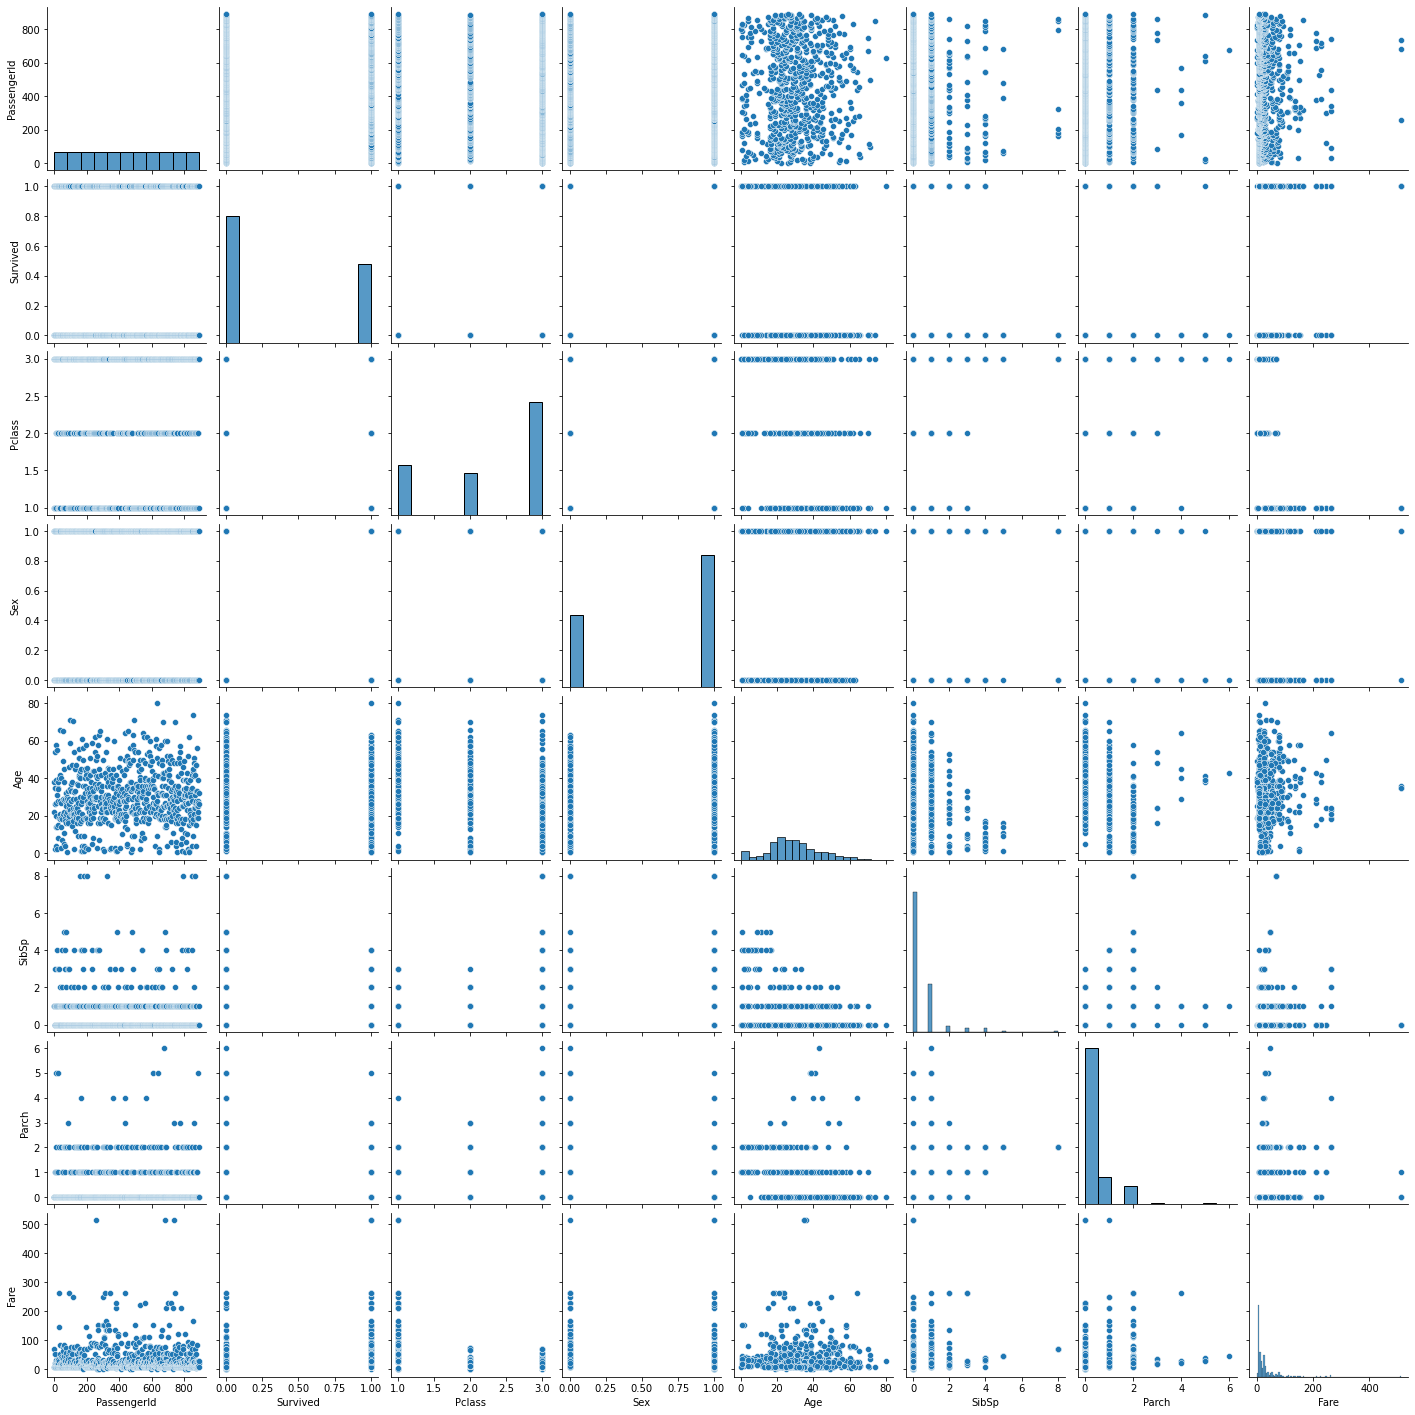

In [ ]:
#Check for obviously correlated attributes - none appear obvious for this dataset
sns.pairplot(titanic_df)

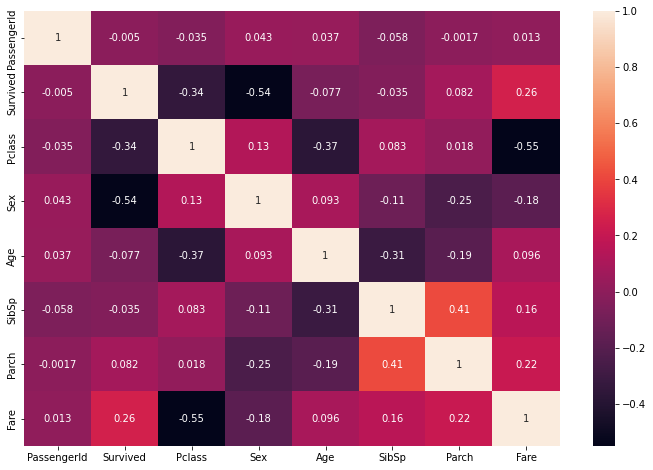

In [ ]:
#Check for correlated attributes - heatmap
plt.figure(figsize = (12, 8))
sns.heatmap(titanic_df.corr(), annot = True)

#Largest correllation between 'Survived' and 'Sex' (negative)
#2nd largest corellation between 'Pclass' and 'SibSp' (positive)

#2nd largest correlation to 'Survived' is 'Age' (negative)
#Passenger class only has a -0.035 (very weak) correlation to 'Survived'

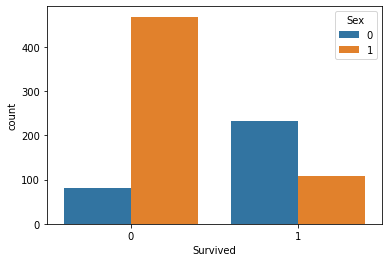

In [ ]:
sns.countplot(x = 'Survived', data = titanic_df, hue = 'Sex')

Text(0, 0.5, 'Age')

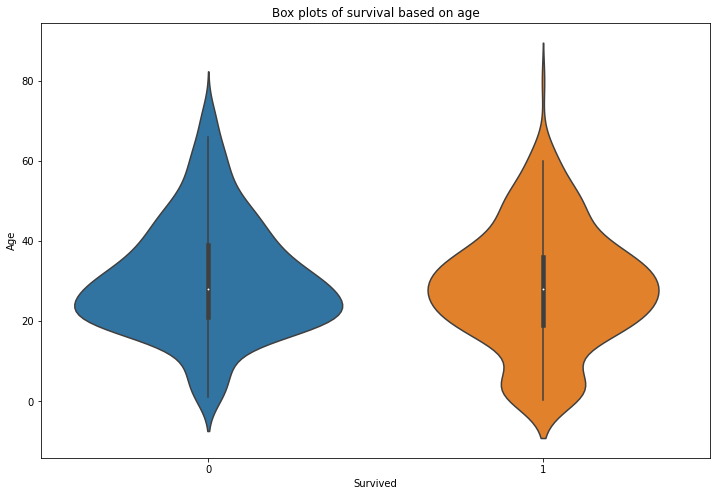

In [ ]:
plt.figure(figsize = (12, 8))
sns.violinplot(x = 'Survived', y = 'Age', data = titanic_df)
plt.title("Box plots of survival based on age")
plt.xlabel("Survived")
plt.ylabel("Age")

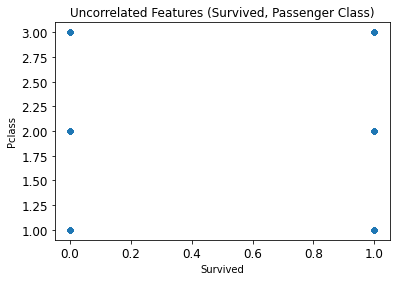

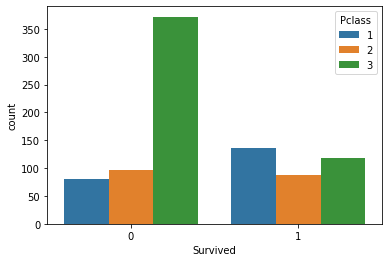

In [ ]:
#Explore correlations
#Correlated: 
titanic_df.plot(x = 'Survived',
        y = 'Pclass',
        kind = 'scatter',
        title = 'Uncorrelated Features (Survived, Passenger Class)', 
        fontsize = 12)

plt.show()

sns.countplot(x = 'Survived', data = titanic_df, hue = 'Pclass')

###Conclusion:
From these investigations I will use Age and Sex as the attributes for learning as these have the greatest correlation with survival rate.

##Question 2: Clean the Data

In [ ]:
#Encoding Sex into numeric values - this has already been done above above for checking correlations
#titanic_df['Sex'].replace('female', 0,inplace=True)
#titanic_df['Sex'].replace('male', 1,inplace=True)

In [ ]:
#Drop rows with null values
titanic_df.dropna(inplace=True)

##Question 3: Create a decision tree and report your findings

In [ ]:
#Extract Regressand
sample_labels = titanic_df.loc[:,'Survived']

In [ ]:
#Extract Regressors
sample_features = titanic_df.loc[:, ['Pclass','Sex','Age']]

In [ ]:
#Question 1 alternative solution. Using F-test to find best features for learning
#Perform F-Test
k = 2

selector = SelectKBest(f_regression, k = k) #create feature selector
selector.fit(sample_features, sample_labels) #fit to sample data
best_feats = selector.get_support(indices = True) #compute 2 best features
train_best_features = sample_features.iloc[:, best_feats] #select best features

train_best_features.head() #show best features

,Sex,Age
1,0,38.0
3,0,35.0
6,1,54.0
10,0,4.0
11,0,58.0


In [ ]:
#Partition into Training and Testing subsets
train_features, test_features, train_labels, test_labels = train_test_split(train_best_features, #all observations/best features regressors
                                                           sample_labels, #all observations/regressand
                                                           test_size = 0.33, #33% used for testing
                                                           random_state = 42) #experiments using this number will be replicated.

In [ ]:
tree1 = DecisionTreeClassifier(criterion = 'entropy').fit(train_features,train_labels)

###Evaluate

In [ ]:
#The accuracy is then calculated through the score function offered by sklearn
print("The prediction accuracy is: ",tree1.score(test_features,test_labels)*100,"%")

The prediction accuracy is:  73.77049180327869 %


###Visualise

In [ ]:
!pip install pydotplus
!pip install six

import os
os.environ["PATH"] += root_path

from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


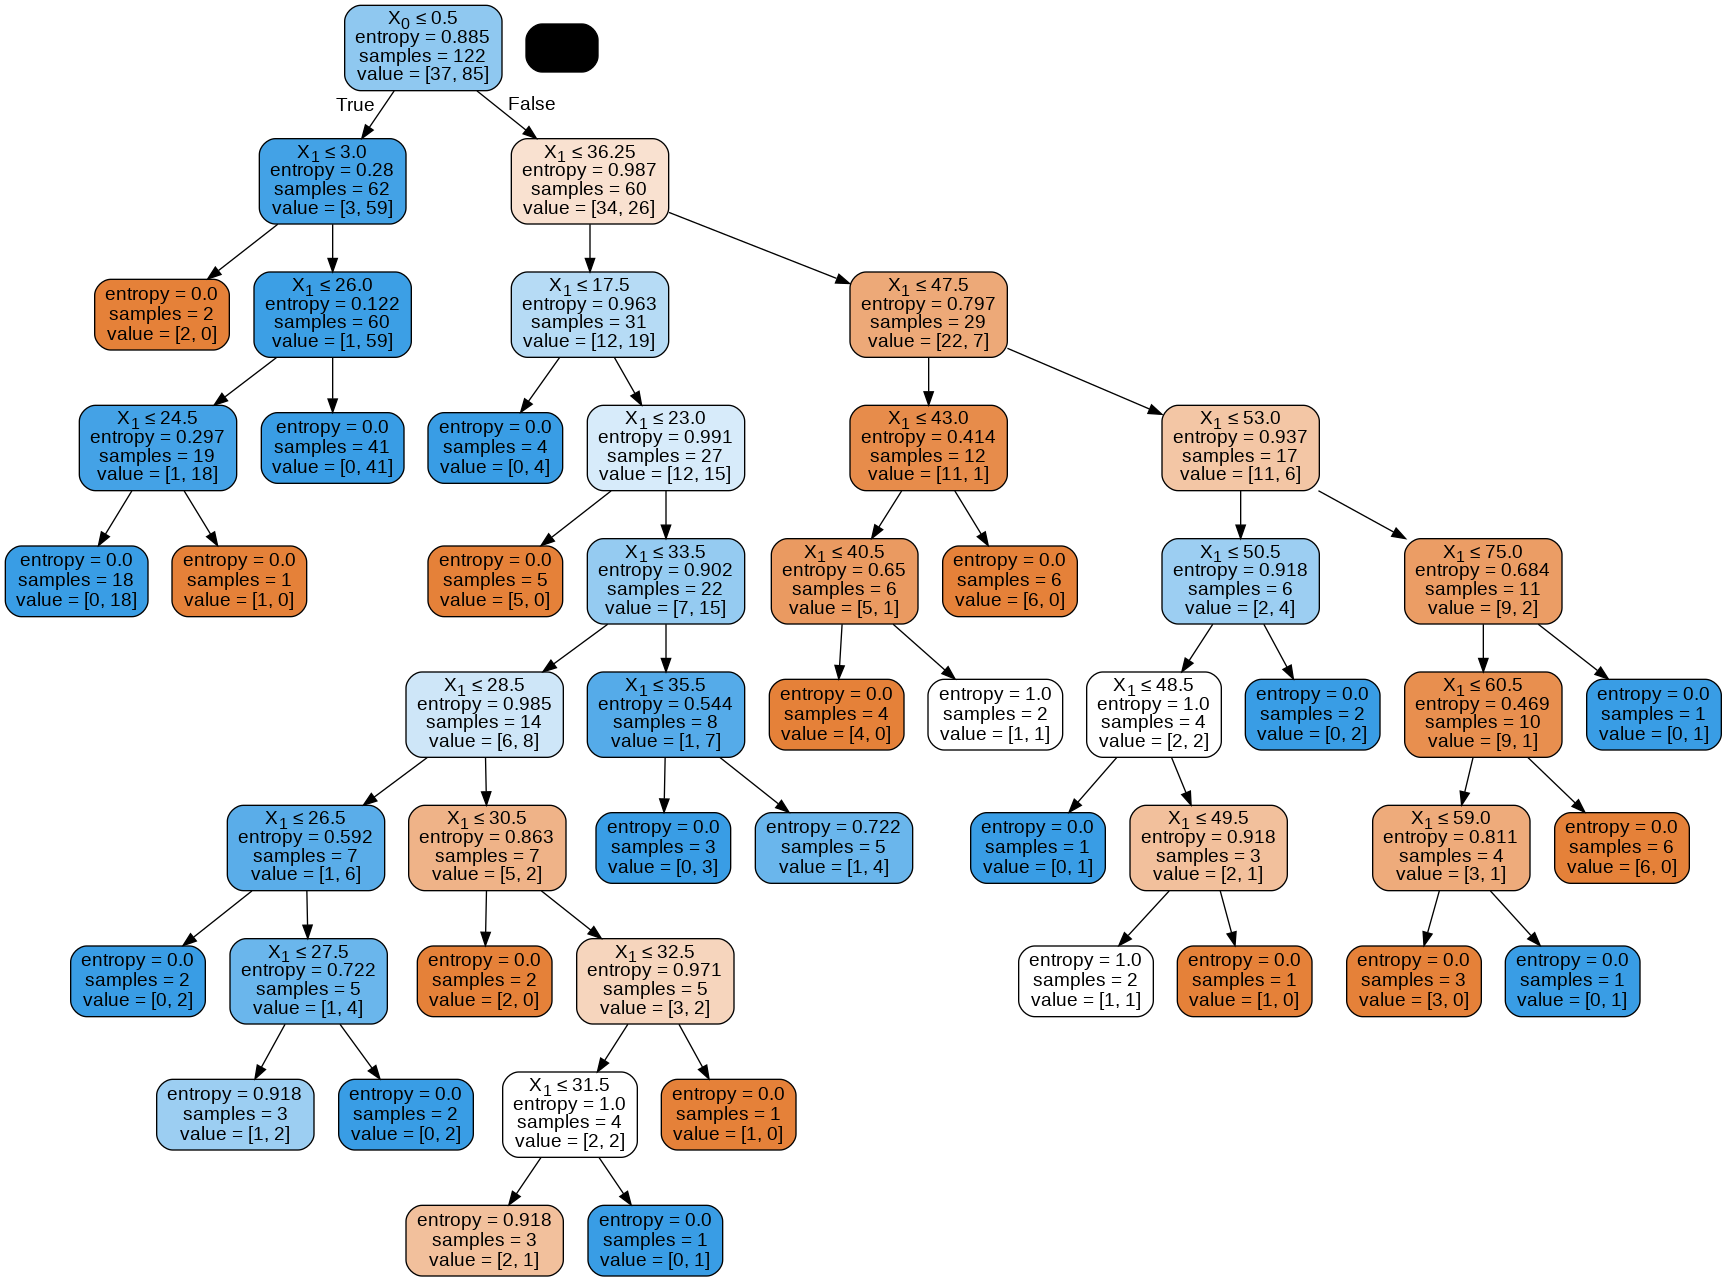

In [ ]:
dot_data = StringIO()
export_graphviz(tree1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#Decision Tree

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression 
from sklearn.model_selection import train_test_split #Function for random splitting of data set
from sklearn import linear_model # Function to create linear regression model
from sklearn.metrics import mean_squared_error, r2_score # Functions used to evaluate models

import pandas as pd
from sklearn.tree import DecisionTreeClassifier 